# Demo for how to calibrate PSF (and possibly other parameters) from line-profiles of fluorescence

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sl2pm import track_vessel
from sl2pm.models import L_wall_plasma, L_plasma_no_glx, L_wall
from sl2pm import misc

## Protocol A (both plasma and wall fluorescence)

In [2]:
kymo_wall = np.load('wall.npy')
kymo_plasma = np.load('plasma.npy')

N_AVER, nx = kymo_wall.shape
x = np.arange(nx)

data_wall = np.mean(kymo_wall, axis=0)
data_plasma = np.mean(kymo_plasma, axis=0)

## Enter PMT parameters (known from the calibration)

In [3]:
ALPHA = 0.452
SIGMA = 6.0
GAIN = 3/ALPHA

## Make an initial parameter guess

In [4]:
p0_A = track_vessel.ols_wall_plasma(data_wall/GAIN, 
                                    data_plasma/GAIN, 
                                    sigma_blur=1.5)

Text(0, 0.5, 'Photon count')

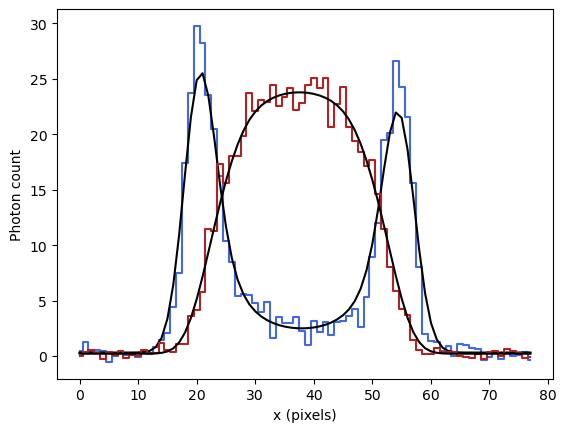

In [5]:
plt.step(x, data_wall/GAIN, where='mid', c='royalblue')
plt.plot(x, L_wall_plasma(x, *p0_A)[0], c='k')

plt.step(x, data_plasma/GAIN, where='mid', c='firebrick')
plt.plot(x, L_wall_plasma(x, *p0_A)[1], c='k')

plt.xlabel('x (pixels)')
plt.ylabel('Photon count')

## Fit

In [6]:
opt_res_A = track_vessel.mle(x,
                             np.array([data_wall, data_plasma]),
                             L_wall_plasma,
                             p0_A,
                             N_AVER, 
                             ALPHA, 
                             SIGMA, 
                             minimize_options=dict(gtol=1e-3))
opt_res_A

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 552.839919103557
        x: [ 3.751e+01  2.099e+00  8.536e+00  1.188e+01  1.778e+01
             6.531e+00 -8.464e-02  2.077e+02  2.841e+01 -6.949e-01
             3.378e-01  2.293e-01]
      nit: 26
      jac: [-1.221e-04 -7.629e-06 -7.629e-05  6.866e-05 -7.629e-06
             8.392e-05  6.104e-05  7.629e-06  1.526e-05  7.629e-06
             0.000e+00  3.815e-05]
 hess_inv: [[ 6.006e-04  8.027e-05 ... -1.117e-05 -1.640e-05]
            [ 8.027e-05  1.836e-03 ... -4.383e-04 -1.622e-04]
            ...
            [-1.117e-05 -4.383e-04 ...  2.788e-03  4.427e-05]
            [-1.640e-05 -1.622e-04 ...  4.427e-05  2.293e-03]]
     nfev: 442
     njev: 34

Text(0, 0.5, 'Photon count')

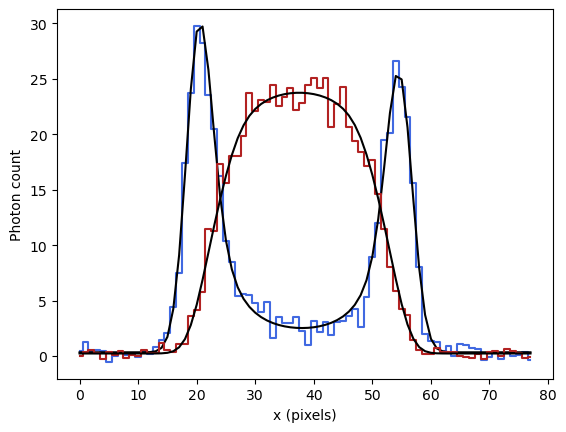

In [7]:
plt.step(x, data_wall/GAIN, where='mid', c='royalblue')
plt.plot(x, L_wall_plasma(x, *opt_res_A.x)[0], c='k')

plt.step(x, data_plasma/GAIN, where='mid', c='firebrick')
plt.plot(x, L_wall_plasma(x, *opt_res_A.x)[1], c='k')

plt.xlabel('x (pixels)')
plt.ylabel('Photon count')

In [8]:
misc.fitted_params(opt_res_A, ['xc', 's_xy', 'l', 'R_lum', 'R_wall', 's_gcx', 'a1', 'Iw', 'Ip', 'b_plasma', 'b_tissue_wall', 'b_tissue_plasma'])

{'xc': (37.51453163685962, 0.02450705723355175),
 's_xy': (2.099005159534542, 0.04284927028027332),
 'l': (8.536429230633773, 1.1680960884558829),
 'R_lum': (11.878117062485623, 0.6892973988610743),
 'R_wall': (17.782738370975036, 0.0703888325059868),
 's_gcx': (6.530696042263424, 1.255915350520455),
 'a1': (-0.08463890327282911, 0.008543540016615015),
 'Iw': (207.70007881622655, 13.270160990273892),
 'Ip': (28.41490737206729, 1.3111213040437604),
 'b_plasma': (-0.694871600603702, 0.8462704490939468),
 'b_tissue_wall': (0.33780403256237346, 0.05279909554101335),
 'b_tissue_plasma': (0.22930785286503735, 0.04788236652924975)}

***

## Calibration: Protocol B (only plasma fluorescence)

In [9]:
kymo_plasma = np.load('plasma.npy')

N_AVER, nx = kymo_plasma.shape
x = np.arange(nx)

data_plasma = np.mean(kymo_plasma, axis=0)

## Enter PMT parameters (known from the calibration)

In [10]:
ALPHA = 0.452
SIGMA = 6.0
GAIN = 3/ALPHA

## Make an initial parameter guess

In [11]:
p0_B = track_vessel.ols_plasma(data_plasma/GAIN, sigma_blur=1.5)

Text(0, 0.5, 'Photon count')

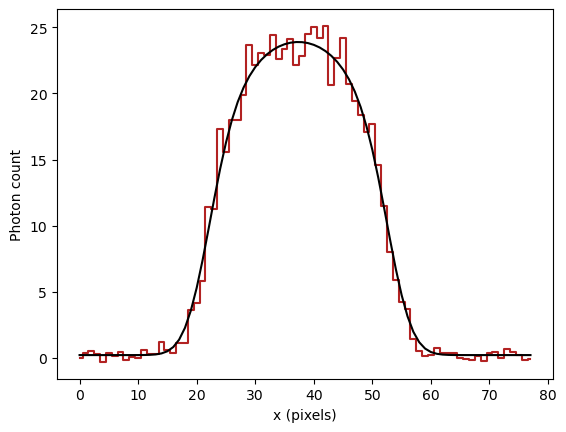

In [12]:
plt.step(x, data_plasma/GAIN, where='mid', c='firebrick')
plt.plot(x, L_plasma_no_glx(x, *p0_B), c='k')

plt.xlabel('x (pixels)')
plt.ylabel('Photon count')

## Fit

In [13]:
opt_res_B = track_vessel.mle(x,
                             data_plasma,
                             L_plasma_no_glx,
                             p0_B,
                             N_AVER, 
                             ALPHA, 
                             SIGMA, 
                             minimize_options=dict(gtol=1e-3))
opt_res_B

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 242.47981782606303
        x: [ 3.736e+01  2.578e+00  2.172e+01  1.662e+01  4.507e+01
             2.245e-01]
      nit: 18
      jac: [-3.815e-05  2.804e-04  3.510e-04 -8.221e-04 -2.480e-04
            -1.316e-04]
 hess_inv: [[ 3.133e-03 -5.870e-04 ...  5.451e-02  3.945e-05]
            [-5.870e-04  4.265e-02 ... -2.901e+00 -3.133e-03]
            ...
            [ 5.451e-02 -2.901e+00 ...  2.794e+02  1.445e-01]
            [ 3.945e-05 -3.133e-03 ...  1.445e-01  2.595e-03]]
     nfev: 168
     njev: 24

Text(0, 0.5, 'Photon count')

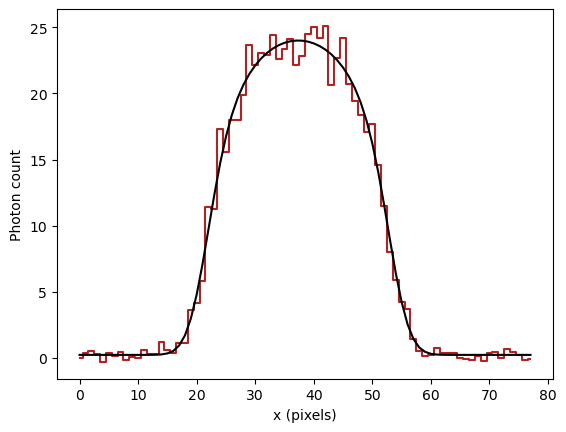

In [14]:
plt.step(x, data_plasma/GAIN, where='mid', c='firebrick')
plt.plot(x, L_plasma_no_glx(x, *opt_res_B.x), c='k')

plt.xlabel('x (pixels)')
plt.ylabel('Photon count')

In [15]:
misc.fitted_params(opt_res_B, ['xc', 's_xy', 'l', 'R_lum', 'I', 'b'])

{'xc': (37.35778255406482, 0.05597690863952322),
 's_xy': (2.5781645846735914, 0.2065269884676794),
 'l': (21.7222969045237, 12.357392492272128),
 'R_lum': (16.621182172150707, 0.3301307577032455),
 'I': (45.06936213006061, 16.713873012976755),
 'b': (0.22445499050208098, 0.050937368818824935)}

***

## Calibration: Protocol C (only wall fluorescence)

In [16]:
kymo_wall = np.load('wall.npy')

N_AVER, nx = kymo_wall.shape
x = np.arange(nx)

data_wall = np.mean(kymo_wall, axis=0)

## Enter PMT parameters (known from the calibration)

In [17]:
ALPHA = 0.452
SIGMA = 6.0
GAIN = 3/ALPHA

## Make an initial parameter guess

In [18]:
p0_C = track_vessel.ols_wall(data_wall/GAIN, sigma_blur=1.5)

Text(0, 0.5, 'Photon count')

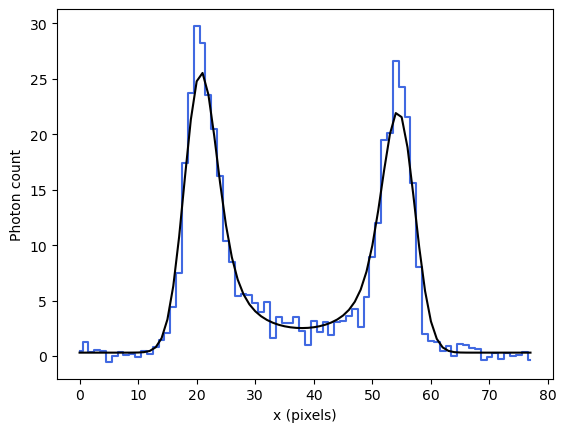

In [19]:
plt.step(x, data_wall/GAIN, where='mid', c='royalblue')
plt.plot(x, L_wall(x, *p0_C), c='k')

plt.xlabel('x (pixels)')
plt.ylabel('Photon count')

## Fit

In [20]:
opt_res_C = track_vessel.mle(x,
                             data_wall,
                             L_wall,
                             p0_C,
                             N_AVER, 
                             ALPHA, 
                             SIGMA, 
                             minimize_options=dict(gtol=1e-3))
opt_res_C

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 302.6080237939512
        x: [ 3.755e+01  2.109e+00  8.115e+00  1.776e+01 -8.535e-02
             2.029e+02 -3.864e-01  3.362e-01]
      nit: 21
      jac: [-7.629e-06  3.052e-05  3.815e-06  6.104e-05  1.144e-04
             3.815e-06 -3.815e-06  1.144e-05]
 hess_inv: [[ 7.340e-04  6.215e-05 ...  4.718e-04 -8.722e-06]
            [ 6.215e-05  1.181e-03 ...  5.054e-03 -4.020e-04]
            ...
            [ 4.718e-04  5.054e-03 ...  1.237e-01 -2.197e-03]
            [-8.722e-06 -4.020e-04 ... -2.197e-03  2.775e-03]]
     nfev: 261
     njev: 29

Text(0, 0.5, 'Photon count')

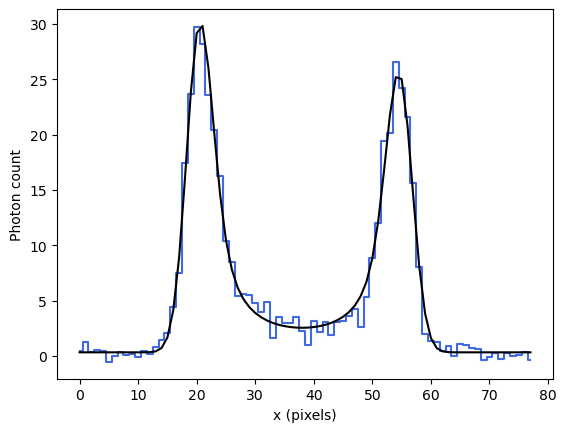

In [21]:
plt.step(x, data_wall/GAIN, where='mid', c='royalblue')
plt.plot(x, L_wall(x, *opt_res_C.x), c='k')

plt.xlabel('x (pixels)')
plt.ylabel('Photon count')

In [22]:
misc.fitted_params(opt_res_C, ['xc', 's_xy', 'l', 'R_wall', 'a1', 'I', 'b_plasma', 'b_tissue'])

{'xc': (37.55043700061187, 0.027092808165276167),
 's_xy': (2.1086986024394143, 0.034372879701832275),
 'l': (8.114830330712262, 0.4975759071390849),
 'R_wall': (17.763958335266377, 0.043204534287131204),
 'a1': (-0.08534711744820678, 0.00908041179110372),
 'I': (202.9246265737403, 5.150646406799206),
 'b_plasma': (-0.38637780158377305, 0.35175832446733873),
 'b_tissue': (0.33624652630799895, 0.05268111083757158)}